<b>GRIP: THE SPARK FOUNDATION</b> 

<b>DATA SCIENCE AND BUSINESS ANALYTICS INTERN</b>

<b>CREATED BY: PRASHANT DHAMUNIA</b> 

<b>TASK 1 : PREDICTION USING SUPERVISED ML</b> 

 <b><i>In this task we have to predict percentage score of a student  based on number  of hours studies. The task has two  variables where the feature is the number of hours studied and the target value is the percentage score. This can be solved using simple linear regression.</i></b>

In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<b><i>Reading data from remote url</i><b>

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)

<b><i>Exploring data</i></b>

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


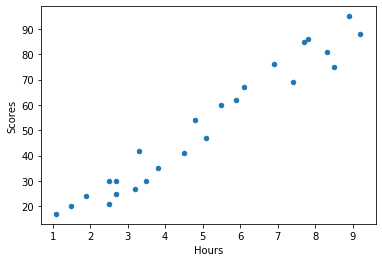

In [6]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
hours=data['Hours']
scores=data['Scores']

In [ ]:
sns.distplot(hours)

In [ ]:
sns.distplot(scores)

<b><i>Linear Regression</i></b>

In [12]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

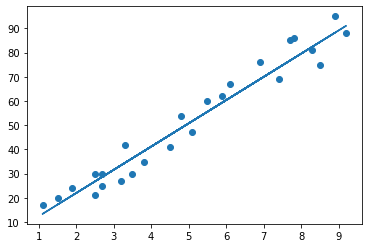

In [17]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [22]:
y_pred=reg.predict(X_test)

In [23]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


In [ ]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

<b>What would be the predicted score if a student studies for 9.25 hours/day?</b>

In [25]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {}% in exam.".format(h,s))


If a student studies for 9.25 hours per day he/she will score [91.56986604]% in exam.


<b>Model evaluation</b>

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
